In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
pokemon = pd.read_csv("pokemon.csv")
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


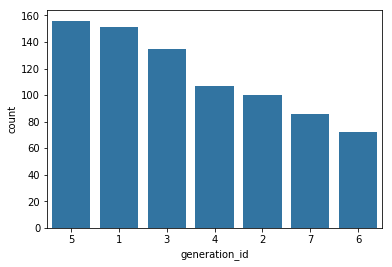

In [23]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_ord)

In [21]:
base_color = sb.color_palette()[0]

In [18]:
gen_ord = pokemon['generation_id'].value_counts().index

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

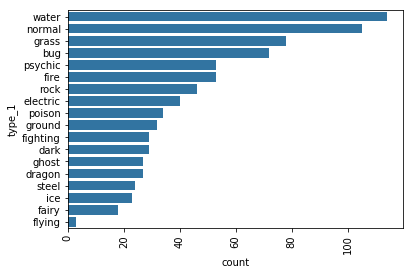

In [27]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_ord)
plt.xticks(rotation = 90)

In [26]:
type_ord = pokemon['type_1'].value_counts().index

In [31]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [33]:
type_order = pkmn_types['type'].value_counts().index

Text(0.5,0,'proportion')

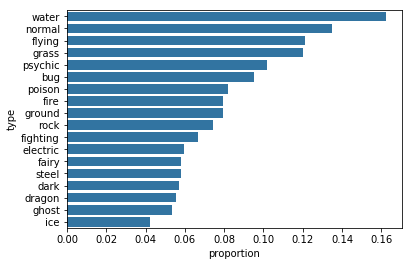

In [54]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel("proportion")

In [41]:
type_counts = pkmn_types['type'].value_counts()
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [66]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)
print(tick_props)

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]


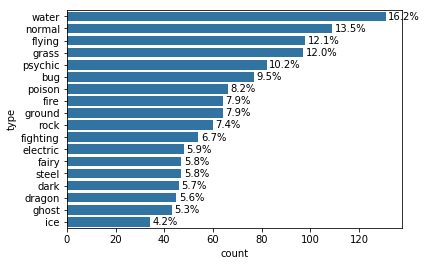

In [64]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

In [69]:
na_counts = pokemon.isna().sum()
na_counts

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

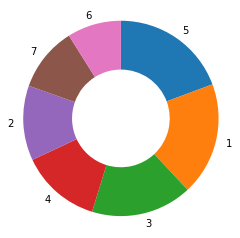

In [82]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90, 
        counterclock = False, 
        wedgeprops = {'width':0.5})
plt.axis('square')

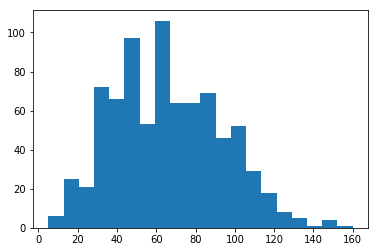

In [97]:
plt.hist(data = pokemon, x = 'speed', bins = 20);

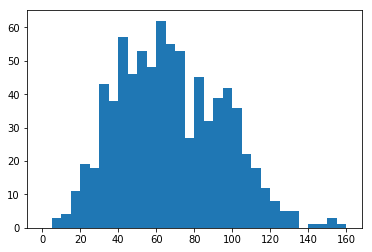

In [90]:
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


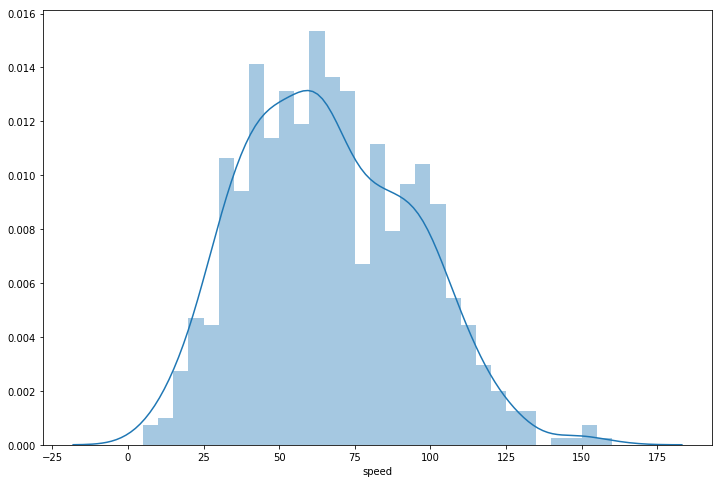

In [106]:
plt.figure(figsize = [12,8]);
sb.distplot(pokemon["speed"], bins = bins);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


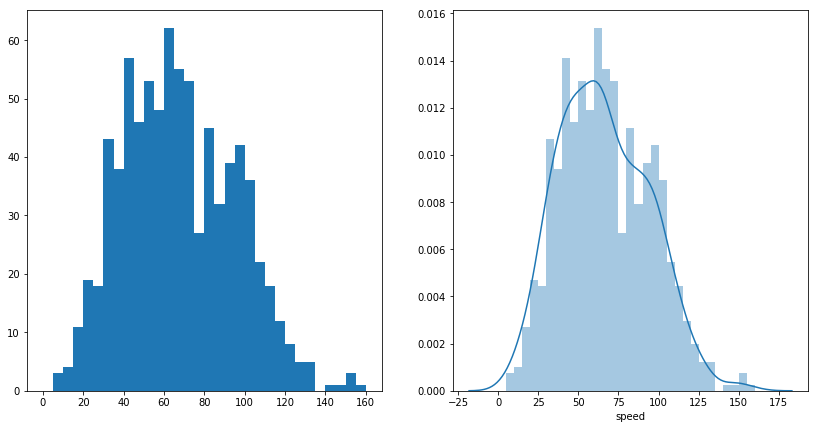

In [112]:
plt.figure(figsize = [14,7]);

plt.subplot(1,2,1);
plt.hist(data = pokemon, x = 'speed', bins = bins);

plt.subplot(1,2,2);
sb.distplot(pokemon["speed"], bins = bins, hist_kws = {'alpha' : .4});

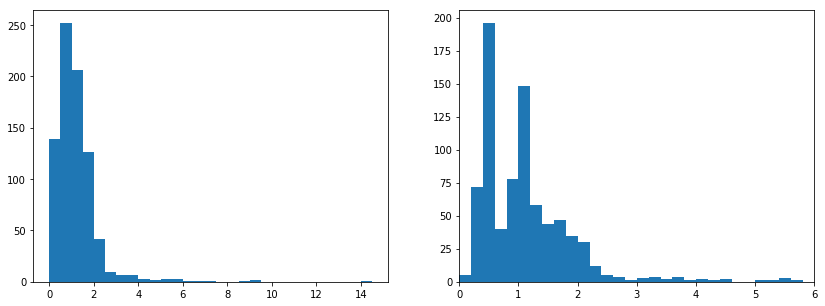

In [122]:
plt.figure(figsize = [14, 5])

plt.subplot(1,2,1)
bins_height1 = np.arange(0, pokemon['height'].max() + .5, .5)
plt.hist(data = pokemon, x = 'height', bins = bins_height1);

plt.subplot(1,2,2)
bins_height2 = np.arange(0, pokemon['height'].max() + .2, .2)
plt.hist(data = pokemon, x = 'height', bins = bins_height2);
plt.xlim((0,6));

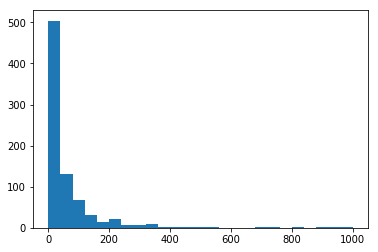

In [123]:
bins_weight = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins_weight);

In [125]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

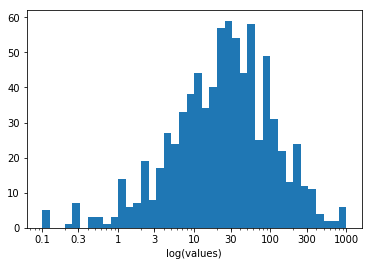

In [134]:
bins_weight = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins_weight);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlabel('log(values)');

In [136]:
def sqrt_trans(x, inverse = False):
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

